## K fold cross validation

In [1]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold
import numpy as np

In [2]:
# create the range 1 to 25
rn = range(1,26)

In [3]:
# to demonstrate how the data are split, we will create 3 and 5 folds. 
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [4]:
# the Kfold function retunrs the indices of the data. Our range goes from 1-25 so the index is 0-24
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8 17 18 19 20 21 22 23 24] [ 9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19 20 21 22 23 24]


In [5]:
# to get the values from our data, we use np.take() to access a value at particular index
for train_index, test_index in kf3.split(rn):
    print(np.take(rn,train_index), np.take(rn,test_index))

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 18 19 20 21 22 23 24 25] [10 11 12 13 14 15 16 17]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20 21 22 23 24 25]


## How does KFold split the data?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Let's split our test range into 5 and3  folds and display the splits on the chart.
# In order to clearly show which data belongs to each set, we will shift the values by -.1 and +.1
# the first fold will contain values 0.9 in train and 1.1 in the test set, second 1.9 and 2.1, etc.
# we will also give each sets the different color
# because we will repeat this exercise for the shuffled version, let's create a function 

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

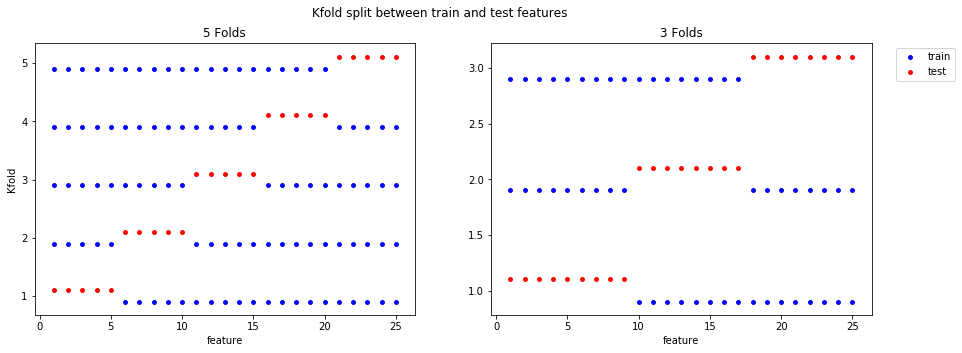

In [8]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## stratified k fold cross validation

In [9]:
# example of stratified k-fold cross-validation with an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0, random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
    # select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=792, 1=8, Test: 0=198, 1=2
>Train: 0=792, 1=8, Test: 0=198, 1=2
>Train: 0=792, 1=8, Test: 0=198, 1=2
>Train: 0=792, 1=8, Test: 0=198, 1=2
>Train: 0=792, 1=8, Test: 0=198, 1=2


In [10]:
# example of stratified train/test split with an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0, random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# summarize
train_0, train_1 = len(trainy[trainy==0]), len(trainy[trainy==1])
test_0, test_1 = len(testy[testy==0]), len(testy[testy==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=495, 1=5, Test: 0=495, 1=5


## leave one out cross validation

In [11]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

2

In [12]:
print(loo)

LeaveOneOut()


In [13]:
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]
